In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv("./../Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x, y = dataset.iloc[:, 2: -1], dataset.iloc[:, -1]

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None)

In [7]:
# Predicting the Test set results
ypredicted = classifier.predict(xtest)
print("The Accuracy = {0:0.2f}%".format(classifier.score(xtest, ytest) * 100))

The Accuracy = 91.25%


In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix as cm
print(cm(ytest, ypredicted))

[[55  3]
 [ 4 18]]


In [9]:
# The probability of 5 elements
classifier.predict_proba(xtest[:5, :])

array([[0.89400067, 0.10599933],
       [0.84165896, 0.15834104],
       [0.85348304, 0.14651696],
       [0.92105103, 0.07894897],
       [0.89959751, 0.10040249]])

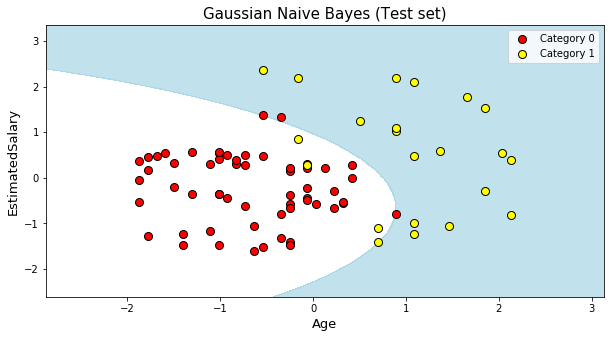

In [10]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize = (10, 5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', "lightblue")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.plot(
    xtest[ytest == 0][:, 0], xtest[ytest == 0][:, 1],
    color = "red",
    marker = 'o',
    markeredgecolor = "black",
    markersize = 8,
    linestyle = '',
    label = "Category 0"
)

plt.plot(    
    xtest[ytest == 1][:, 0], xtest[ytest == 1][:, 1],
    color = "yellow",
    marker = 'o',
    markeredgecolor = "black",
    markersize = 8,
    linestyle = '',
    label = "Category 1"
)

plt.title("Gaussian Naive Bayes (Test set)", fontsize = 15)
plt.xlabel(s = "Age", fontsize = 13)
plt.ylabel(s = "EstimatedSalary", fontsize = 13)
plt.legend()
plt.show()
